In [1]:
#https://www.pluralsight.com/guides/image-classification-with-pytorch
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
#https://medium.com/bitgrit-data-science-publication/building-an-image-classification-model-with-pytorch-from-scratch-f10452073212
#https://discuss.pytorch.org/t/valueerror-expected-input-batch-size-324-to-match-target-batch-size-4/24498/4
#https://www.tensorflow.org/hub/tutorials/image_feature_vector?fbclid=IwAR0khthMzzqpuvpau9lQO7D3hvdMjNtr3MyLdtN6t5_pNfp_dXT_6EtixWQ
#https://pyimagesearch.com/2021/10/11/pytorch-transfer-learning-and-image-classification/



import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from statistics import mean
import os
from torch.utils.data import Dataset, DataLoader
#from sklearn.model_selection import train_test_split
from torchvision import datasets
from tqdm import tqdm

%matplotlib inline
means = [0.485,0.456,0.406]
std = [0.229,0.224,0.225]


C:\Users\homol\anaconda3\envs\newENV\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_transform = transforms.Compose([transforms.Resize((200,200)),
                                      transforms.ToTensor(),
                                      transforms.Normalize(means,std)])

test_transform = transforms.Compose([transforms.Resize((200,200)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(means,std)])

valid_transform = transforms.Compose([transforms.Resize((200,200)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(means,std)])

In [3]:
data_dir = './class_dataset/dataset/'
train_datasets = datasets.ImageFolder(os.path.join(data_dir,'train'),train_transform)
valid_datasets = datasets.ImageFolder(os.path.join(data_dir,'val'),valid_transform)

print(train_datasets.classes)
print(len(train_datasets))

['bus', 'car', 'car_with_trailer', 'large_car', 'motorcycle', 'small_truck', 'truck', 'truck_with_trailer', 'unknown', 'van', 'van_with_trailer']
38028


In [4]:
train_loader=DataLoader(dataset = train_datasets,batch_size=16,shuffle = True, num_workers=4)
valid_loader=DataLoader(dataset = valid_datasets,batch_size=16,shuffle = False, num_workers=4)



In [5]:
#train_data = CactiDataset(train, train_path, train_transform )
#valid_data = CactiDataset(valid_data, train_path, valid_transform )
#test_data = CactiDataset(submission, test_path, test_transform )

In [6]:
num_epochs = 10
num_classes = 11
batch_size = 16
learning_rate = 0.001

In [7]:
import tensorflow as tf
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# create a data generator
#datagen = tf.keras.preprocessing.image.ImageDataGenerator()


train_path = r'/class_dataset/dataset/train/'
valid_path =r'/class_dataset/dataset/val/'
test_path = r'/class_dataset/dataset/test/'


In [8]:
#train_it = datagen.flow_from_directory('class_dataset/dataset/train/', class_mode='binary', batch_size=64)
#train_loader = train_it
# load and iterate validation dataset
#val_it = datagen.flow_from_directory('class_dataset/dataset/val/', class_mode='binary', batch_size=64)
#valid_loader = val_it
# load and iterate test dataset
#test_it = datagen.flow_from_directory('class_dataset/dataset/test/', class_mode='binary', batch_size=64)

In [9]:
print(str(device))
print(torch.cuda.get_device_name(0))

cuda:0
NVIDIA GeForce GTX 1050


In [10]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class CNN(nn.Module): 
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3)
#         self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
#         self.conv2_drop = nn.Dropout2d()
#         self.fc1 = nn.Linear(720, 1024)
#         self.fc2 = nn.Linear(1024, 11)

#     def forward(self, x):
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         x = x.view(x.shape[0],-1)
#         x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
#         x = self.fc2(x)
#         return x

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 47 * 47, 1024)   #1024,740
        self.fc2 = nn.Linear(1024, 740)      #120/84
        self.fc3 = nn.Linear(740, 11)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1,16 * 47 * 47)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [12]:
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=35344, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=740, bias=True)
  (fc3): Linear(in_features=740, out_features=11, bias=True)
)


In [13]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)
optimizer = torch.optim.Adam(model.parameters())

#SGD , momentum=0.9
#Adam

In [14]:
%%time
# keeping-track-of-losses 
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    # keep-track-of-training-and-validation-loss
    train_loss = 0.0
    valid_loss = 0.0
    
    # training-the-model
    print("Training-the-model")
    model.train()
    for data, target in tqdm(train_loader):
        # move-tensors-to-GPU 
        data = data.to(device)
        target = target.to(device)
        
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        output = model(data)
        # calculate-the-batch-loss
        loss = criterion(output, target)
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        # perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
        # update-training-loss
        train_loss += loss.item() * data.size(0)
        
    # validate-the-model
    print("Validate-the-model")
    model.eval()
    for data, target in tqdm(valid_loader):
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        loss = criterion(output, target)
        
        # update-average-validation-loss 
        valid_loss += loss.item() * data.size(0)
    
    # calculate-average-losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    print(len(valid_losses))

        
    # print-training/validation-statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    #if valid lossesgo wrong
    print(len(valid_losses))
    help_number = len(valid_losses)
    if help_number > 1:
        if valid_losses[help_number-1] > valid_losses[help_number-2]:
            break
    
# path = "./model.pth"
# torch.save(net.state_dict(), path)
# print('Finished Training')

Training-the-model


100%|██████████| 2377/2377 [02:59<00:00, 13.27it/s]


Validate-the-model


100%|██████████| 338/338 [00:16<00:00, 20.56it/s]


1
Epoch: 1 	Training Loss: 0.930710 	Validation Loss: 0.780340
1
Training-the-model


100%|██████████| 2377/2377 [02:54<00:00, 13.64it/s]


Validate-the-model


100%|██████████| 338/338 [00:17<00:00, 19.03it/s]


2
Epoch: 2 	Training Loss: 0.396507 	Validation Loss: 0.720217
2
Training-the-model


100%|██████████| 2377/2377 [02:54<00:00, 13.60it/s]


Validate-the-model


100%|██████████| 338/338 [00:15<00:00, 21.79it/s]

3
Epoch: 3 	Training Loss: 0.212481 	Validation Loss: 0.847209
3
CPU times: total: 3min 43s
Wall time: 9min 37s


In [15]:
# test-the-model
model.eval()  # it-disables-dropout
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))
    
# Save 
#torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model: 80.24074074074075 %


In [ ]:
classes = ('bus', 'car', 'car_with_trailer', 'large_car', 'motorcycle', 'small_truck', 'truck', 'truck_with_trailer', 'unknown', 'van', 'van_with_trailer')
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

model.eval()  # it-disables-dropout
# again no gradients needed
with torch.no_grad():
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

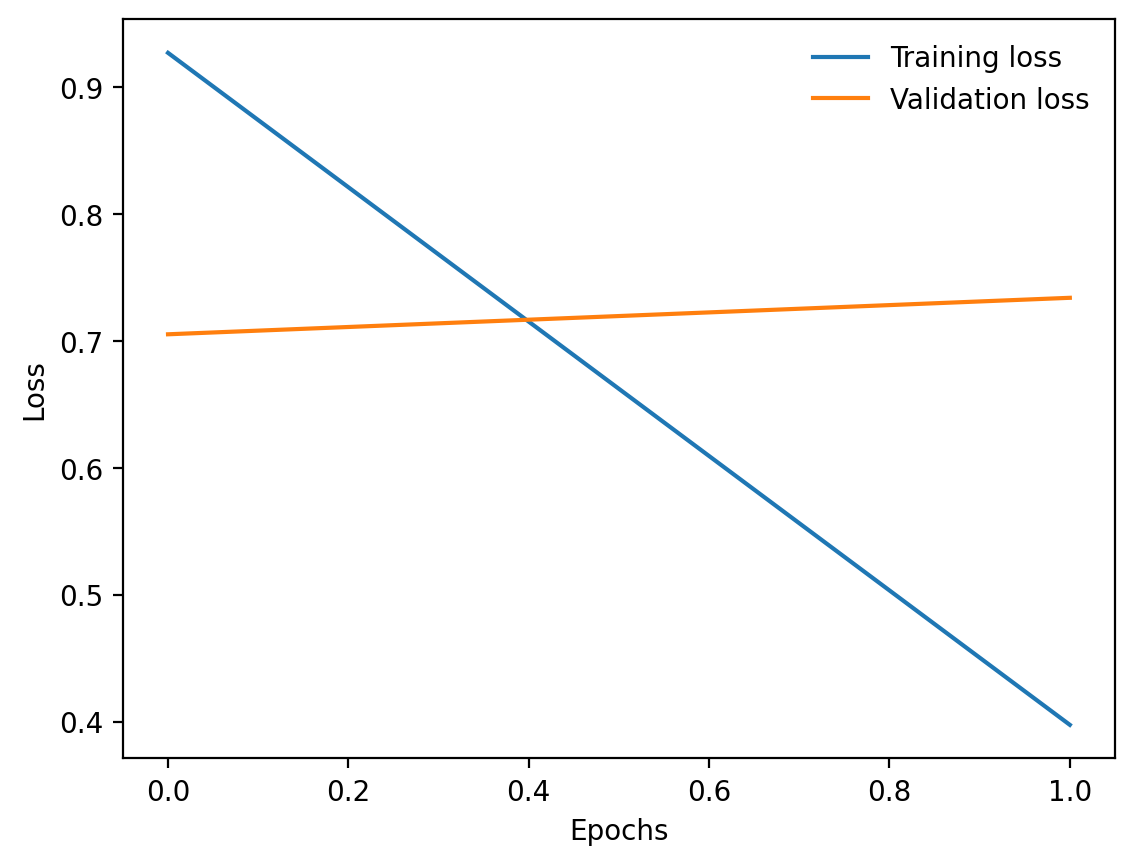

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)